# 1. 数据读取与初步了解

In [73]:
# 导入常用库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import geopandas as gpd
from shapely.geometry import Point
from pysal.explore import esda
from pysal.lib import weights
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 读取数据
df = pd.read_csv(r'/home/mw/input/water17531753/water_pollution_disease.csv')
df.head()

,Country,Region,Year,Water Source Type,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (mug/L),...,"Cholera Cases per 100,000 people","Typhoid Cases per 100,000 people","Infant Mortality Rate (per 1,000 live births)",GDP per Capita (USD),Healthcare Access Index (0 - 100),Urbanization Rate (%),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (degC),Population Density (people per km**2)
0,Mexico,North,2015,Lake,6.06,7.12,3.93,4.28,8.28,7.89,...,33,44,76.16,57057,96.92,84.61,63.23,2800,4.94,593
1,Brazil,West,2017,Well,5.24,7.84,4.79,3.86,15.74,14.68,...,27,8,77.30,17220,84.73,73.37,29.12,1572,16.93,234
2,Indonesia,Central,2022,Pond,0.24,6.43,0.79,3.42,36.67,9.96,...,39,50,48.45,86022,58.37,72.86,93.56,2074,21.73,57
3,Nigeria,East,2016,Well,7.91,6.71,1.96,3.12,36.92,6.77,...,33,13,95.66,31166,39.07,71.07,94.25,937,3.79,555
4,Mexico,South,2005,Well,0.12,8.16,4.22,9.15,49.35,12.51,...,31,68,58.78,25661,23.03,55.55,69.23,2295,31.44,414


In [75]:
df = df.dropna(subset=[
    'Contaminant Level (ppm)', 'pH Level', 'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)',
    'Nitrate Level (mg/L)', 'Lead Concentration (mug/L)', 'Bacteria Count (CFU/mL)',
    'Access to Clean Water (% of Population)', 'Diarrheal Cases per 100,000 people',
    'GDP per Capita (USD)', 'Healthcare Access Index (0 - 100)', 'Urbanization Rate (%)',
    'Sanitation Coverage (% of Population)', 'Rainfall (mm per year)', 'Temperature (degC)',
    'Population Density (people per km**2)'
])

# 2. 字段说明（Markdown）


In [76]:
df = pd.get_dummies(df, columns=['Country', 'Region', 'Water Source Type', 'Water Treatment Method'])

# 3. 数据清洗

In [77]:
# 缺失值统计
df.isnull().sum()

Year                                             0
Contaminant Level (ppm)                          0
pH Level                                         0
Turbidity (NTU)                                  0
Dissolved Oxygen (mg/L)                          0
Nitrate Level (mg/L)                             0
Lead Concentration (mug/L)                       0
Bacteria Count (CFU/mL)                          0
Access to Clean Water (% of Population)          0
Diarrheal Cases per 100,000 people               0
Cholera Cases per 100,000 people                 0
Typhoid Cases per 100,000 people                 0
Infant Mortality Rate (per 1,000 live births)    0
GDP per Capita (USD)                             0
Healthcare Access Index (0 - 100)                0
Urbanization Rate (%)                            0
Sanitation Coverage (% of Population)            0
Rainfall (mm per year)                           0
Temperature (degC)                               0
Population Density (people per 

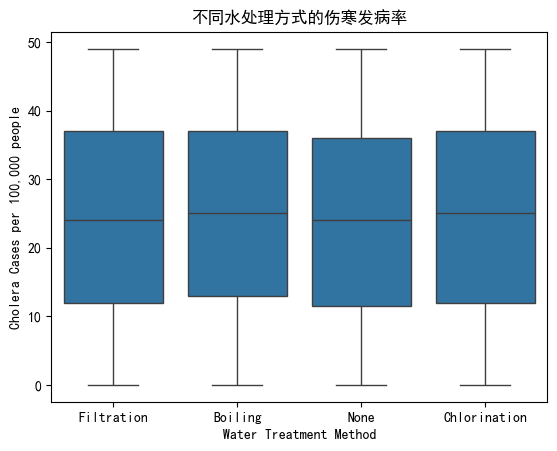

In [ ]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 中文支持
import seaborn as sns
import matplotlib.pyplot as plt

df_raw = pd.read_csv('/home/mw/input/water17531753/water_pollution_disease.csv', keep_default_na=False, na_values=[])
sns.boxplot(x='Water Treatment Method', y='Cholera Cases per 100,000 people', data=df_raw)
plt.title('不同水处理方式的伤寒发病率')
plt.show()

# 4. 描述性统计分析

In [79]:
# 主要变量描述性统计
df.describe()

,Year,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (mug/L),Bacteria Count (CFU/mL),Access to Clean Water (% of Population),"Diarrheal Cases per 100,000 people","Cholera Cases per 100,000 people","Typhoid Cases per 100,000 people","Infant Mortality Rate (per 1,000 live births)",GDP per Capita (USD),Healthcare Access Index (0 - 100),Urbanization Rate (%),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (degC),Population Density (people per km**2)
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2012.012667,4.954390,7.255847,2.480023,6.492850,25.08025,10.047913,2488.477333,64.612333,249.776667,24.25100,49.270000,50.811900,50036.196667,50.029193,50.062480,60.371007,1591.849000,20.130917,505.390333
std,7.229287,2.860072,0.720464,1.419984,2.027966,14.50517,5.798238,1431.421553,20.308463,144.111543,14.33259,28.984165,28.465323,28598.750508,28.896676,22.779125,23.159678,817.502434,11.689244,283.275224
min,2000.000000,0.000000,6.000000,0.000000,3.000000,0.05000,0.000000,0.000000,30.010000,0.000000,0.00000,0.000000,2.060000,521.000000,0.190000,10.030000,20.010000,200.000000,0.060000,10.000000
25%,2006.000000,2.560000,6.630000,1.257500,4.710000,12.52500,5.120000,1268.000000,47.027500,124.000000,12.00000,24.000000,26.467500,25010.250000,24.982500,30.557500,40.440000,865.750000,9.840000,254.750000
50%,2012.000000,4.950000,7.280000,2.460000,6.490000,24.79000,10.065000,2469.000000,64.780000,248.000000,24.00000,49.000000,50.230000,49621.500000,50.390000,49.795000,60.580000,1572.000000,20.175000,513.000000
75%,2018.000000,7.400000,7.870000,3.660000,8.252500,37.91000,15.032500,3736.250000,82.302500,378.000000,37.00000,75.000000,76.260000,74778.250000,74.817500,69.727500,80.420000,2308.250000,30.672500,745.000000
max,2024.000000,10.000000,8.500000,4.990000,10.000000,49.99000,20.000000,4998.000000,99.990000,499.000000,49.00000,99.000000,99.990000,99948.000000,99.980000,89.980000,99.990000,2999.000000,39.990000,999.000000


In [80]:
# 统计各水处理方式的样本数和腹泻发病率均值
df_raw.groupby('Water Treatment Method')['Cholera Cases per 100,000 people'].agg(['count', 'mean'])

,count,mean
Water Treatment Method,,
Boiling,777,24.409266
Chlorination,748,24.453209
Filtration,728,24.385989
None,747,23.752343


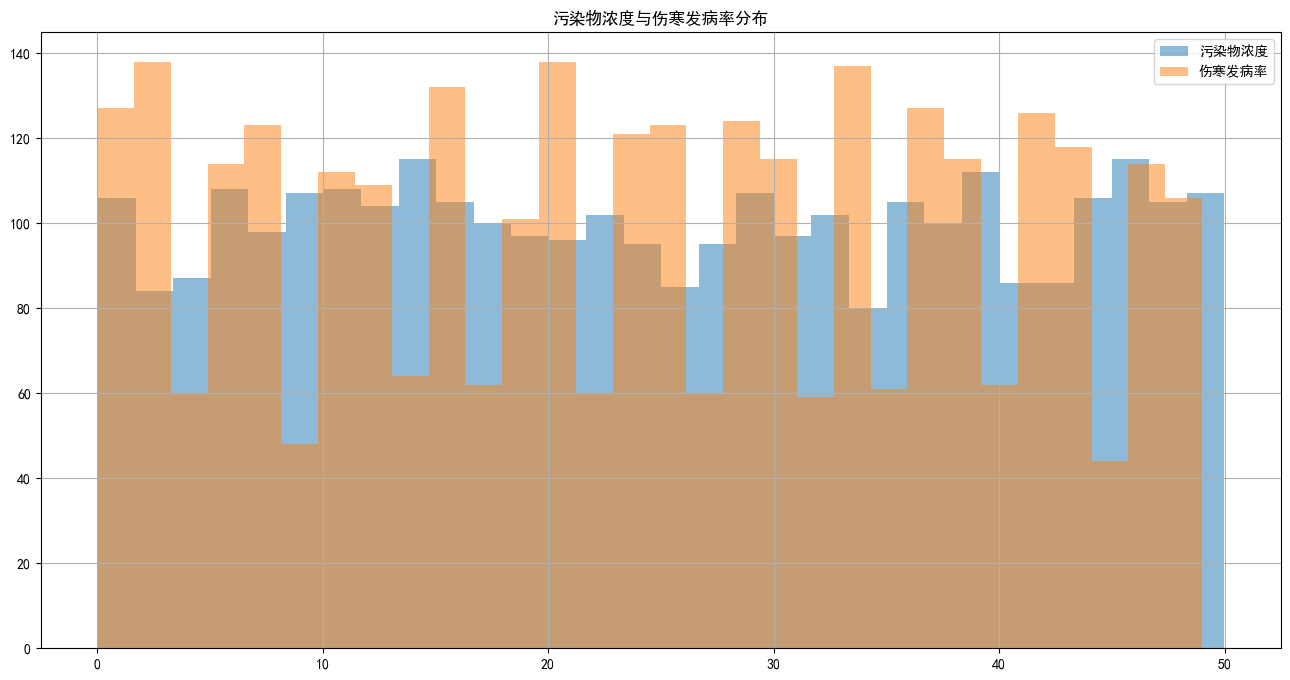

In [81]:
# 变量分布直方图
plt.figure(figsize=(16, 8))
df['Nitrate Level (mg/L)'].hist(bins=30, alpha=0.5, label='污染物浓度')
df['Cholera Cases per 100,000 people'].hist(bins=30, alpha=0.5, label='伤寒发病率')
plt.legend()
plt.title('污染物浓度与伤寒发病率分布')
plt.show()

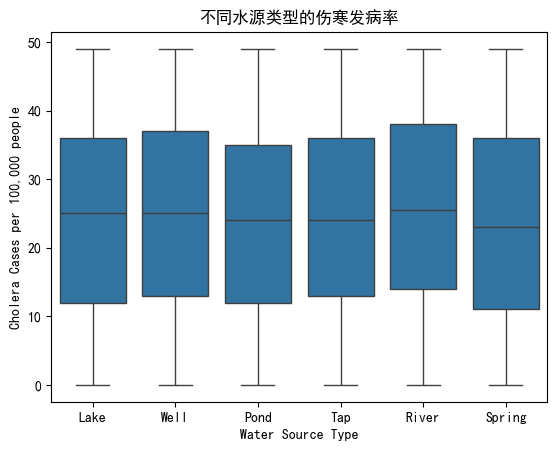

In [ ]:
# 箱线图：不同水源类型的腹泻发病率
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 中文支持
sns.boxplot(x='Water Source Type', y='Cholera Cases per 100,000 people', data=pd.read_csv(r'/home/mw/input/water17531753/water_pollution_disease.csv'))
plt.title('不同水源类型的伤寒发病率')
plt.show()

# 5. 相关性与因果探索

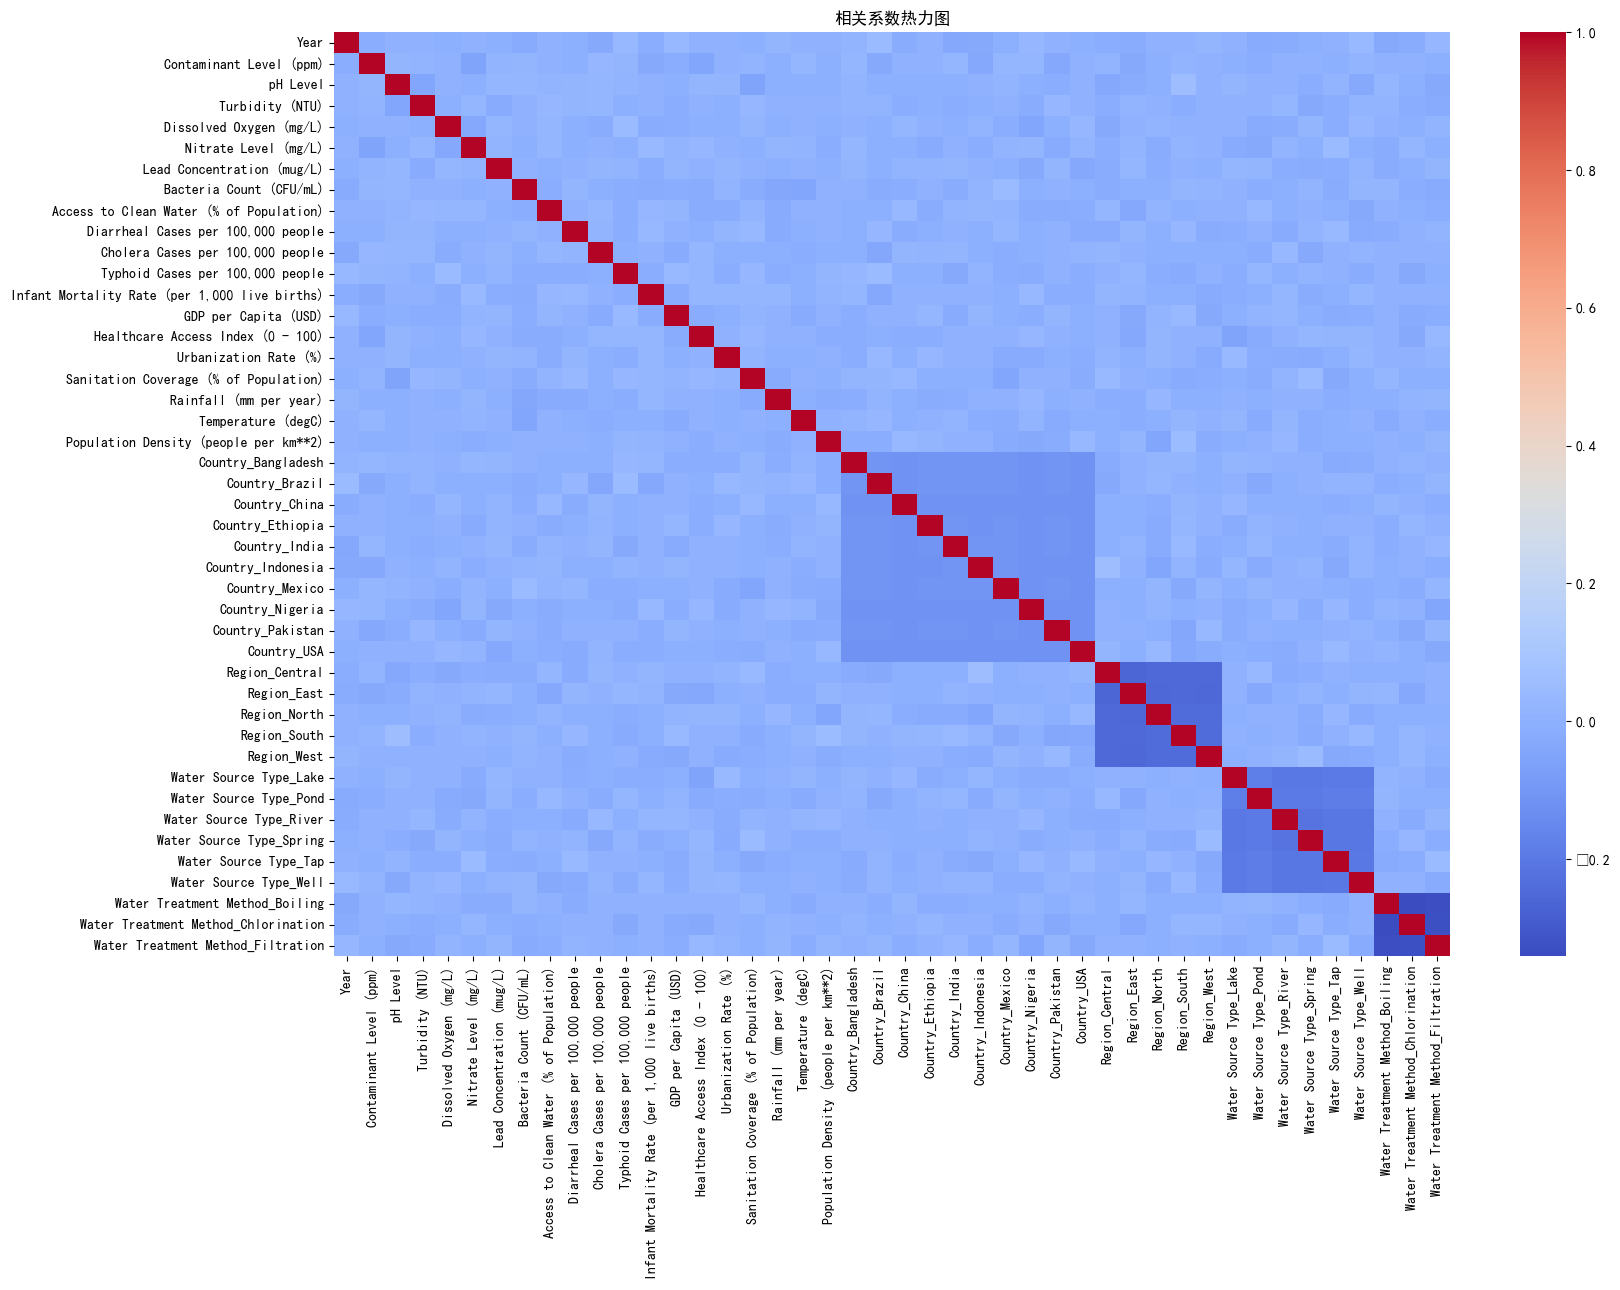

In [83]:
# 相关系数矩阵
corr = df.corr()
plt.figure(figsize=(18, 12))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('相关系数热力图')
plt.show()

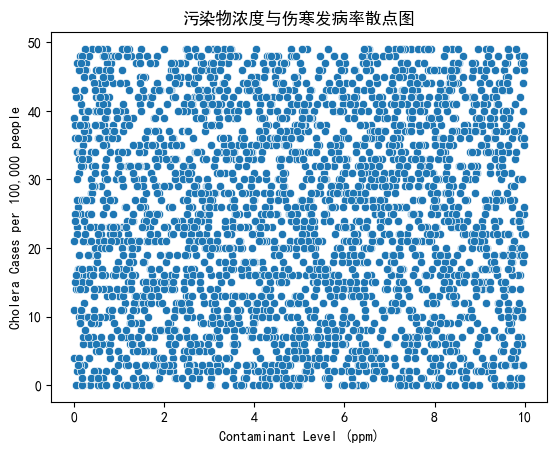

In [ ]:
# 相关性强的变量散点图
sns.scatterplot(x='Contaminant Level (ppm)', y='Cholera Cases per 100,000 people', data=pd.read_csv(r'/home/mw/input/water17531753/water_pollution_disease.csv'))
plt.title('污染物浓度与伤寒发病率散点图')
plt.show()

# 6. 分组与对比分析

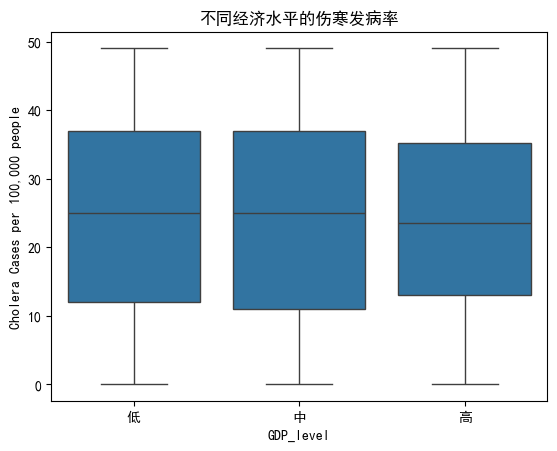

In [ ]:
# 按人均GDP分组（高、中、低）
df_raw = pd.read_csv(r'/home/mw/input/water17531753/water_pollution_disease.csv')
df_raw['GDP_level'] = pd.qcut(df_raw['GDP per Capita (USD)'], 3, labels=['低', '中', '高'])
sns.boxplot(x='GDP_level', y='Cholera Cases per 100,000 people', data=df_raw)
plt.title('不同经济水平的伤寒发病率')
plt.show()

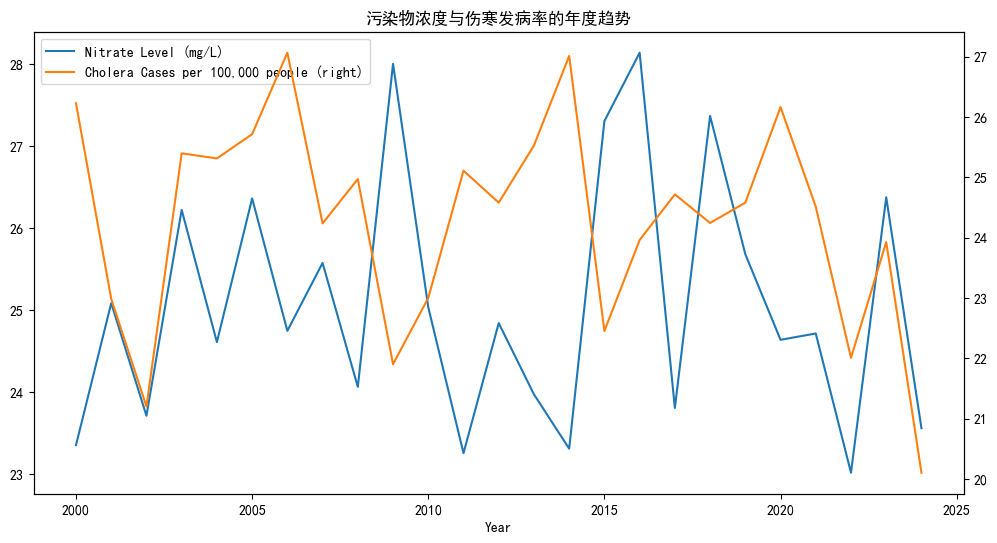

In [86]:
# 时间序列趋势
df_year = df_raw.groupby('Year').mean(numeric_only=True)
df_year[['Nitrate Level (mg/L)', 'Cholera Cases per 100,000 people']].plot(secondary_y='Cholera Cases per 100,000 people', figsize=(12,6))
plt.title('污染物浓度与伤寒发病率的年度趋势')
plt.show()

# 7. 建模与预测

In [87]:
# 选取部分变量建模
X = df[['Contaminant Level (ppm)', 'pH Level', 'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'Nitrate Level (mg/L)', 'Lead Concentration (mug/L)', 'GDP per Capita (USD)', 'Healthcare Access Index (0 - 100)', 'Urbanization Rate (%)', 'Sanitation Coverage (% of Population)', 'Rainfall (mm per year)', 'Temperature (degC)', 'Population Density (people per km**2)']]
y = df['Cholera Cases per 100,000 people']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('回归系数:', dict(zip(X.columns, model.coef_)))

R2: 0.0030818582477466494
MSE: 205.2328350866854
回归系数: {'Contaminant Level (ppm)': 0.10168156908725835, 'pH Level': 0.2582610402550095, 'Turbidity (NTU)': 0.21719268287553672, 'Dissolved Oxygen (mg/L)': -0.12484894969024894, 'Nitrate Level (mg/L)': 0.01159128582742101, 'Lead Concentration (mug/L)': 0.06058947601068007, 'GDP per Capita (USD)': -7.257400239770945e-06, 'Healthcare Access Index (0 - 100)': 0.014260648443680489, 'Urbanization Rate (%)': -0.007636597563780441, 'Sanitation Coverage (% of Population)': 0.0035708260048120887, 'Rainfall (mm per year)': -5.2729218341550585e-05, 'Temperature (degC)': -0.018380544624102296, 'Population Density (people per km**2)': 0.0003101028671140105}


# 8. 空间分析：地理自相关

### 1）按国家+地区分组，统计疾病发病率均值

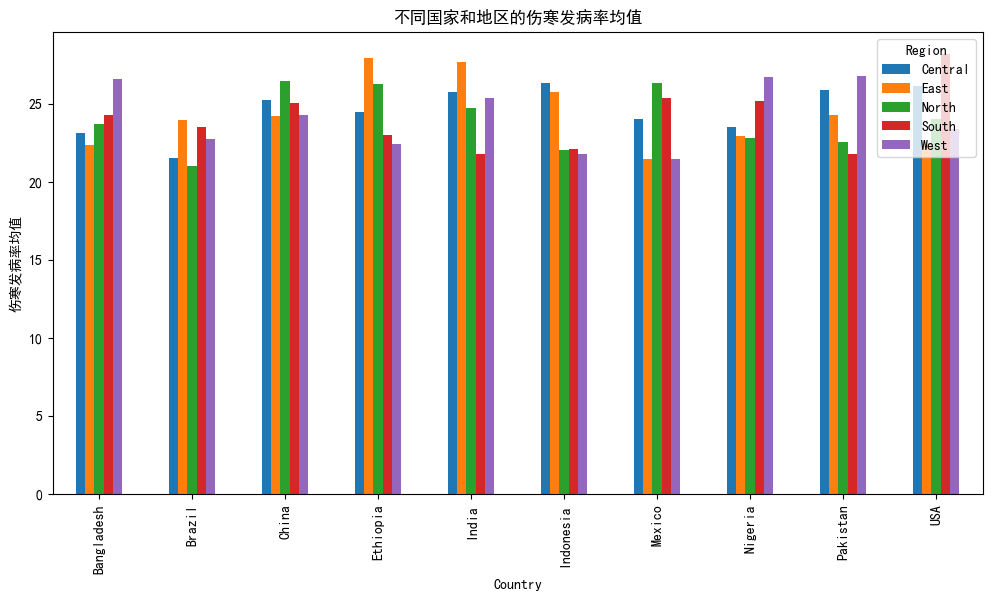

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/home/mw/input/water17531753/water_pollution_disease.csv', keep_default_na=False, na_values=[])

# 按国家和地区分组，统计伤寒发病率均值
grouped = df.groupby(['Country', 'Region'])['Cholera Cases per 100,000 people'].mean().unstack()
grouped.plot(kind='bar', figsize=(12,6))
plt.ylabel('伤寒发病率均值')
plt.title('不同国家和地区的伤寒发病率均值')
plt.show()

### 2）只按地区分组，统计疾病发病率均值

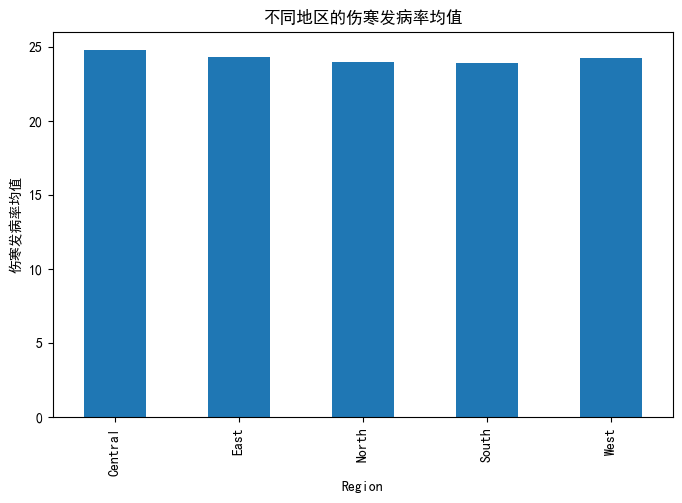

In [89]:
region_mean = df.groupby('Region')['Cholera Cases per 100,000 people'].mean()
region_mean.plot(kind='bar', figsize=(8,5))
plt.ylabel('伤寒发病率均值')
plt.title('不同地区的伤寒发病率均值')
plt.show()

### 用地区的均值/方差/分布做“空间分布”分析
计算各地区的疾病发病率标准差，判断空间分布差异。
画热力图，展示国家-地区二维分布。

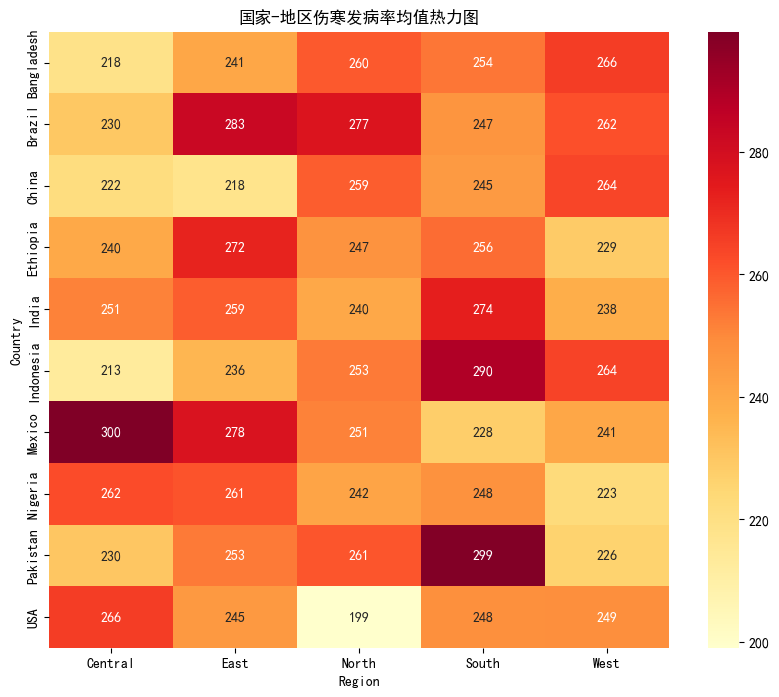

In [90]:
pivot = df.pivot_table(index='Country', columns='Region', values='Diarrheal Cases per 100,000 people', aggfunc='mean')
plt.figure(figsize=(10,8))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('国家-地区伤寒发病率均值热力图')
plt.show()